# Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Video Capture

In [2]:
cap = cv2.VideoCapture("Videos/chaplin.mp4")

# Read the capture and get the first frame

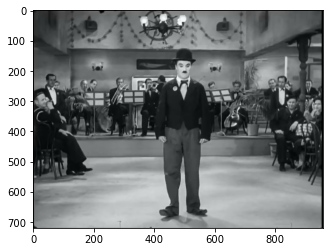

In [3]:
ret , first_frame = cap.read()
plt.imshow(first_frame)

# Convert frame to Grayscale

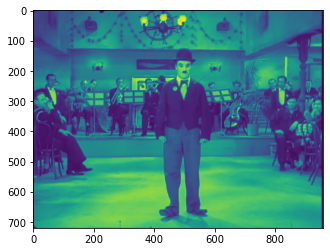

In [4]:
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
plt.imshow(prev_gray)

# Create# Create an image with the same dimensions as the frame for later drawing purposes

In [5]:
mask = np.zeros_like(first_frame)

# Saturation to maximum

In [6]:
mask[...,1] = 255

In [7]:
# While loop
while(cap.isOpened()):
    
    # Read the capture and get the first frame
    ret,frame = cap.read()
    
    # Open new window and display the input frame
    cv2.imshow('input', frame)
    
    # Convert all frame to Grayscale (previously we did only the first frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculate dense optical flow by Farneback
    flow = cv2.calcOpticalFlowFarneback(prev_gray,
                                       gray,
                                       None,
                                       0.5,
                                       3,
                                       15,
                                       3,
                                       5,
                                       1.2,
                                       0)
    
    # Compute Magnitude and Angle
    magn, angle = cv2.cartToPolar(flow[..., 0],
                                 flow[..., 1])
    
    # Set image hue depanding on the optical flow direction
    mask[..., 0] = angle*180/np.pi/2    
        
    # Normalize the magnitude
    mask[..., 2] = cv2.normalize(magn,
                                None,
                                0,
                                255,
                                cv2.NORM_MINMAX)
    
    # Convert HSV to RGB
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2RGB)
    
    # Open new window and display the output
    cv2.imshow("Dense Optcal Flow", rgb)
    
    # Update previous frame
    prev_gray = gray
    
    # Close the frame
    if cv2.waitKey(300) & 0xFF == ord("q"):
        break
    
# Release and Destroy
cap.release()
cv2.destroyAllWindows()

